# Assignment 2

_EE2703: Applied Programming_

*Author: Varun Sundar, EE16B068*

#### Conventions

1. We are using Python 3, GCC for C 
2. Underscore naming vs Camel Case
3. PEP 25 convention style.

In [1]:
import numpy as np

## Question 1

In [2]:
def f(t):
    # t could be a vector
    return 1/(1+np.square(t))

## Question 2

In [4]:
# Create a spacing of 0.1
x=np.linspace(0.0, 5.0, num=51)
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ])

## Question 3

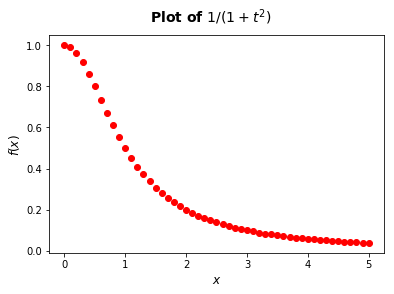

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.suptitle(r'Plot of $1/(1+t^{2})$', fontsize=14,fontweight="bold")

plt.xlabel('$x$',fontsize=12)
plt.ylabel('$f(x)$',fontsize=12)

plt.plot(x,f(x),'ro')
plt.show()

## Question 4

In [8]:
from scipy.integrate import quad
quad?

In [102]:
from pprint import pprint
integrated_arctan=np.array([quad(f,0,a)[0] for a in x])
# A Few values
pprint(integrated_arctan[:8])

array([ 0.        ,  0.09966865,  0.19739556,  0.29145679,  0.38050638,
        0.46364761,  0.5404195 ,  0.61072596])


In [103]:
np_arctan=np.arctan(x)
# A Few Values
pprint(np_arctan[:10])

array([ 0.        ,  0.09966865,  0.19739556,  0.29145679,  0.38050638,
        0.46364761,  0.5404195 ,  0.61072596,  0.67474094,  0.7328151 ])


Using, $\tan^{-1}{x}$ instead of $\arctan{x}$
$\def\arctanAlt{\tan^{-1}}$

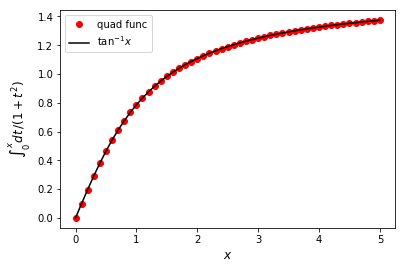

In [11]:
plt.plot(x,np_arctan, 'ro',x, integrated_arctan,'k-')
plt.legend(("quad func",r"$\tan^{-1}{x}$"))
plt.xlabel('$x$',fontsize=12)
plt.ylabel('$\int_{0}^{x} dt\,/(1+t^{2})$',fontsize=12)
plt.show()

In [12]:
# Set plot sizes
import matplotlib
matplotlib.rcParams['figure.figsize']=[8,6]

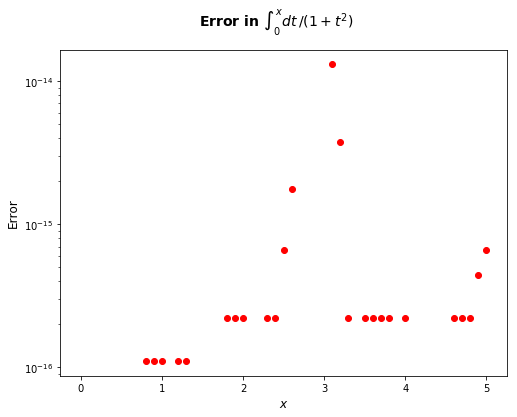

In [13]:
plt.semilogy(x,np.abs(np_arctan - integrated_arctan), 'ro')
plt.xlabel('$x$',fontsize=12)
plt.ylabel("Error",fontsize=12)
plt.suptitle(r'Error in $\int_{0}^{x}dt\,/(1+t^{2})$', fontsize=14,fontweight="bold")
plt.show()

## Question 5

In [28]:
# Define a single integral
def integral(f,x,i):
    # f is the function
    # x is your array of values
    # i is the desired index (from 0 to n-2)
    # h is the trapezoidal step
    h=(np.amax(x)-np.amin(x))/len(x)
    j=i+1
    return h*(np.sum(f(x[:j]))-1/2*(f(x[0])+f(x[j])))

integral(f,x,1)

0.098953899914878352

A vectorised implementation  ...

In [48]:
def integral_vectorised(f,x):
    # f is the function
    # x is your array of values
    # i is the desired index (from 0 to n-2)
    # h is the trapezoidal step
    h=(np.amax(x)-np.amin(x))/(len(x)-1)
    n=len(x)
    return np.array([h*(np.cumsum(f(x))[j]-1/2*(f(x[0])+f(x[j]))) for j in range(n)])

integral_vectorised(f,x)

array([ 0.        ,  0.09950495,  0.19708682,  0.29103531,  0.38001031,
        0.46311376,  0.53987847,  0.61020022,  0.67424507,  0.73235719,
        0.7849815 ,  0.83260593,  0.87572217,  0.91480133,  0.95028059,
        0.98255709,  1.01198665,  1.03888507,  1.06353099,  1.08616943,
        1.10701542,  1.12625756,  1.14406135,  1.16057212,  1.17591769,
        1.19021069,  1.20355055,  1.21602521,  1.22771268,  1.23868228,
        1.24899578,  1.25870832,  1.26786925,  1.27652286,  1.28470897,
        1.29246345,  1.29981869,  1.30680403,  1.31344605,  1.31976891,
        1.3257946 ,  1.33154319,  1.337033  ,  1.34228082,  1.34730204,
        1.35211077,  1.35672003,  1.36114179,  1.3653871 ,  1.36946616,
        1.37338844])

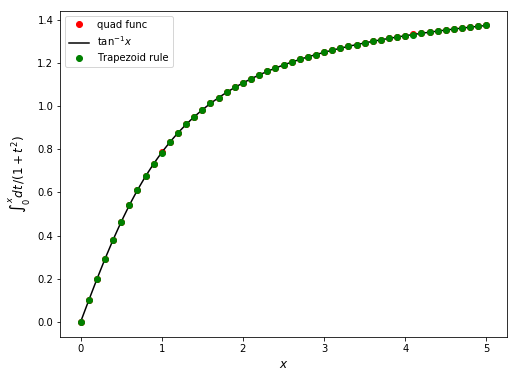

In [49]:
plt.plot(x,np_arctan, 'ro',x, integrated_arctan,'k-',x,integral_vectorised(f,x),'go')
plt.legend(("quad func",r"$\tan^{-1}{x}$","Trapezoid rule"))
plt.xlabel('$x$',fontsize=12)
plt.ylabel('$\int_{0}^{x} dt\,/(1+t^{2})$',fontsize=12)
plt.show()

Let's define a handy function

In [50]:
def error(u,v):
    # Return maximum error between two numpy arrays
    return np.amax(np.abs(u-v))

And now use this to find out absolute errors.

In [75]:
h_array=[10**(-j) for j in range(1,5)]
x_array=[np.linspace(0.0, 5.0, num=5/(h)+1) for h in h_array]
[error(np.arctan(x),integral_vectorised(f,x)) for x in x_array ]

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


[0.00054103142650707703,
 5.4126137517540585e-06,
 5.4126577109236962e-08,
 5.4126414461563854e-10]

We note that $h<10^{-4}$ is gives us error tolerences $\delta < 10^{-8}$. So we ad-hoc start from $h=10^{-2}$ and descend to $h=10^{-4}$; and note down requisite error.

In [104]:
# A bottom threshold on the value of h
h_sweet=5*10**(-4)

In [83]:
i=4*10**(-2)
h_array=[]
for j in range(8):
    h_array.append(i/2)
    i=i/2
h_array

[0.02, 0.01, 0.005, 0.0025, 0.00125, 0.000625, 0.0003125, 0.00015625]

In [84]:
x_array=[np.linspace(0.0, 5.0, num=5/(h)+1) for h in h_array]
error_exact_array=[error(np.arctan(x),integral_vectorised(f,x)) for x in x_array ]
error_exact_array

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


[2.1650937672923476e-05,
 5.4126137517540585e-06,
 1.3531503878505546e-06,
 3.3829131440565874e-07,
 8.4572799208260108e-08,
 2.1143197970197036e-08,
 5.2857990207044736e-09,
 1.3214487282198206e-09]

We define our _estimated error_ as follows: 

For every integral with the trapezoidal width $h$, consider one with $\frac{h}{2}$ to be the truth for the test.

To facilitate this, we define a function called _cross-error_ which computes the corrresponding error. Obviously, we compared only sampled values which are same.

In [82]:
def cross_error(h1,h2):
    # Return between h1, h2
    # Assume h2 is h1/2
    h_array=[h1,h2]
    x1,x2=[np.linspace(0.0, 5.0, num=5/(h)+1) for h in h_array]
    i1=integral_vectorised(f,x1)
    i2=integral_vectorised(f,x2)
    return error(i1,i2[::2])

cross_error(0.02,0.01)

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


1.6238323921169417e-05

In [88]:
cross_tuples=[(h_array[i],h_array[i+1]) for i in range(len(h_array)-1)]
estimated_errors=[cross_error(h_tuple[0],h_tuple[1]) for h_tuple in cross_tuples]
pass

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


In [72]:
estimated_errors

[1.6238323921169417e-05,
 4.0594678555327945e-06,
 1.0148632708650851e-06,
 2.5371851519739863e-07,
 6.3429601238063071e-08,
 1.5857398949492563e-08,
 3.9643504035069554e-09]

In [74]:
error_exact_array

[2.1650937672923476e-05,
 5.4126137517540585e-06,
 1.3531503878505546e-06,
 3.3829131440565874e-07,
 8.4572799208260108e-08,
 2.1143197970197036e-08,
 5.2857990207044736e-09,
 1.3214487282198206e-09]

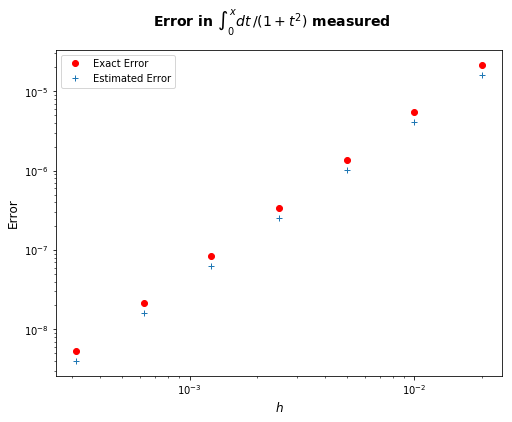

In [93]:
# Now to plot errors
plt.loglog(h_array[:7],error_exact_array[:7],'ro',h_array[:7],estimated_errors[:7],'+')
plt.xlabel('$h$',fontsize=12)
plt.ylabel("Error",fontsize=12)
plt.legend(("Exact Error",r"Estimated Error"))
plt.suptitle(r'Error in $\int_{0}^{x}dt\,/(1+t^{2})$ measured' , fontsize=14,fontweight="bold")
plt.show()